In [16]:
# Importación de librerías

import numpy as np
import pandas as pd
import sklearn.compose as Compose
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

import re

In [5]:
train_url = "https://raw.githubusercontent.com/Kekon130/ML_Practica2/main/train.csv"
df_train = pd.read_csv(train_url)

test_url = "https://raw.githubusercontent.com/Kekon130/ML_Practica2/main/test.csv"
df_test = pd.read_csv(test_url)

#pd.set_option('display.max_columns', None)
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,3985,4,Lawrencez,40.0,856431180.0,Accountant,97384.44,8167.370000,1.0,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,40663,49494,2,Mohammedr,39.0,417453942.0,Writer,31369.58,2607.131667,8.0,...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,111059,2925,6,Alistairn,17.0,499528888.0,Writer,30171.86,2772.321667,6.0,...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,72139,21358,2,Dinesh Naire,22.0,859449371.0,Doctor,13100.02,1246.668333,7.0,...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,119841,21221,4,Bakerg,26.0,485239890.0,Doctor,62313.54,5120.795000,6.0,...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,42636,39869,7,Hendrik Sackmannb,50.0,217529489.0,Media_Manager,107761.29,9047.107500,4.0,...,Standard,34.09,41.899992,211.0,Yes,0.000000,150.220682,High_spent_Large_value_payments,984.123010,Standard
79996,114031,38305,2,Alexj,33.0,98861902.0,Scientist,16218.32,1098.526667,6.0,...,Bad,4466.33,24.275710,98.0,NM,64.533114,34.457893,High_spent_Small_value_payments,260.523798,Poor
79997,85991,9976,6,Luciana Lopezi,25.0,745835485.0,Engineer,29374.77,2377.897500,3.0,...,Standard,1189.37,38.439021,241.0,NM,40.264074,22.234178,High_spent_Medium_value_payments,403.980355,Standard
79998,21240,13193,7,Edward Krudyd,15.0,894419091.0,Manager,43782.45,3543.537500,6.0,...,Bad,3468.25,24.233841,85.0,Yes,240.664739,42.839562,Low_spent_Large_value_payments,146.741586,Poor


In [69]:
df_train['Type_of_Loan'].unique()

array(['Debt Consolidation Loan',
       'Home Equity Loan, Not Specified, Not Specified, Personal Loan, Not Specified, Mortgage Loan, Mortgage Loan, and Personal Loan',
       'Personal Loan, Home Equity Loan, Home Equity Loan, Mortgage Loan, Personal Loan, Student Loan, Credit-Builder Loan, Mortgage Loan, and Mortgage Loan',
       ...,
       'Student Loan, Personal Loan, Home Equity Loan, Home Equity Loan, Not Specified, and Auto Loan',
       'Personal Loan, Credit-Builder Loan, Credit-Builder Loan, Auto Loan, Mortgage Loan, and Credit-Builder Loan',
       'Home Equity Loan, Home Equity Loan, and Credit-Builder Loan'],
      dtype=object)


## Analizando las columnas

In [ ]:
# Customer ID. 
# Esta se deja tal cual y no se toca, la necesitamos

In [57]:
def transformar_valores(columna, decimal):
  for index, row in df_train.iterrows():
    df_train.loc[index, columna] = round(df_train.loc[index, columna], decimal)

transformar_valores("Annual_Income", -4)
transformar_valores("Monthly_Inhand_Salary", -3)
transformar_valores("Changed_Credit_Limit", -1)
transformar_valores("Outstanding_Debt", -2)
transformar_valores("Credit_Utilization_Ratio", 1)
transformar_valores("Total_EMI_per_month", -1)
transformar_valores("Amount_invested_monthly", -1)
transformar_valores("Monthly_Balance", -2)

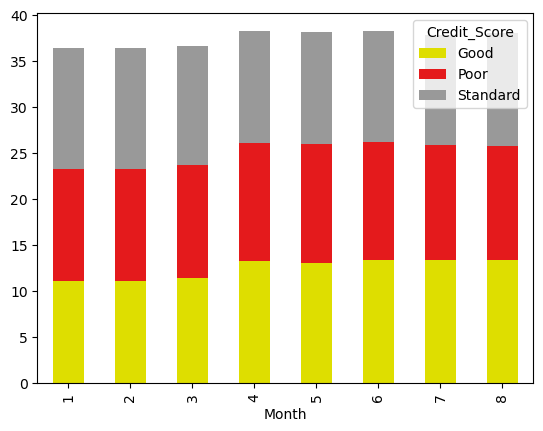

In [ ]:
# Month
# Representa el mes del año en el que se actualizó la información

# Podemos ver cómo el mes no influye casi nada, los valores están prácticamente igual repartidos 
plot = pd.crosstab(index=df_train['Month'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])


In [ ]:
# Name
# Esta variable la vamos a borrar, ya que tiene bastantes menos valores que el Customer_ID y ello puede dar problemas para el tratamiento posterior. Además no nos aporta nada.

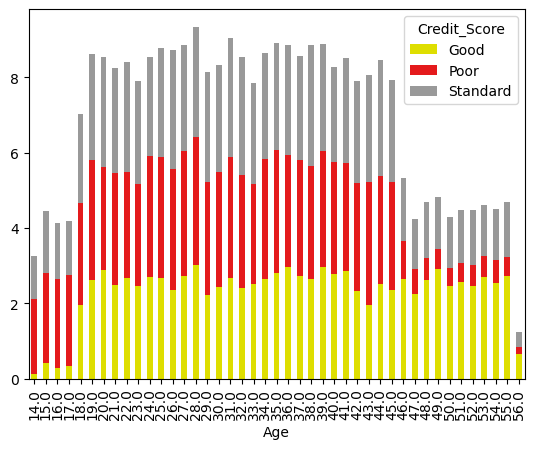

In [ ]:
# Age
# Edad -> Clasificar en tres grupos (va desde los 14 años hasta los 59)        juventud (14 - 26)           adultez (27 - 40)          otro (41 - 59)

# Vemos la realcion de edad con la bariable objetivosss

plot = pd.crosstab(index=df_train['Age'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])


# Malos: 17
# Estándar: 46
# Bueno: 

In [ ]:
# SNN
df_train.Customer_ID.nunique()
df_train.SSN.nunique()                                  # La seguridad social la vamos a borrar entonces

# Ambos devuelven tienen el mismo numero, vamos, que cada uno va ligado a un mismo cliente.

12500

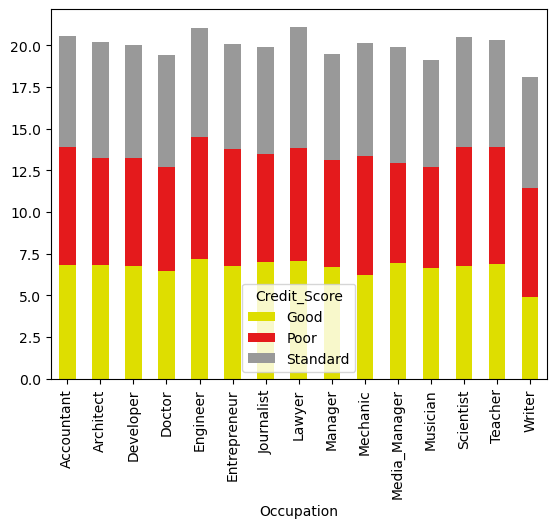

In [ ]:
# Occupation
output = pd.crosstab(df_train["Credit_Score"], df_train["Occupation"])
output

plot = pd.crosstab(index=df_train['Occupation'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Es bastante estable en todos los campos 

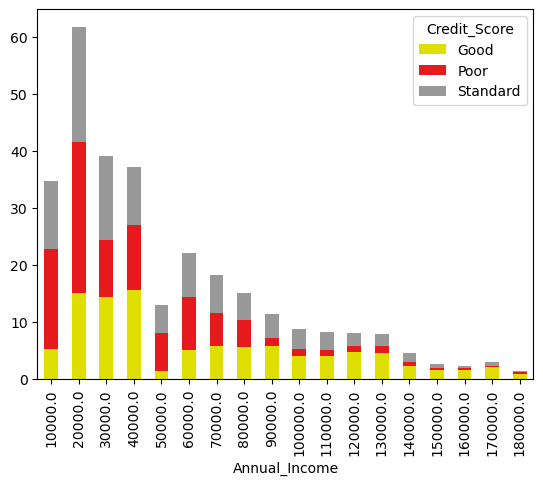

In [ ]:
plot = pd.crosstab(index=df_train['Annual_Income'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Podemos observar cosas importantes y obvias, como quien tiene más dinero tiene un historial crediticio mejor y cómo el que gana menos lo tiene bastante peor. 
# A parte del tratamiento de resondear a los 10K no se me ocurre otro
# 0-50.000 50.000-90.000 90.000 - ...

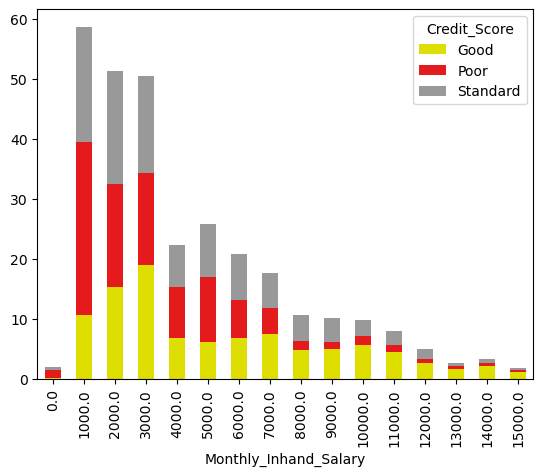

In [ ]:
# Monthly_Inhand_Salary
# Aquí haremos lo mismo que en los ingresos anuales, pero redonderaremos a 1000 
plot = pd.crosstab(index=df_train['Monthly_Inhand_Salary'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Los resultados son muy similares al anterior
# 0-3 bajo 4-8 medio 8- ... mucho

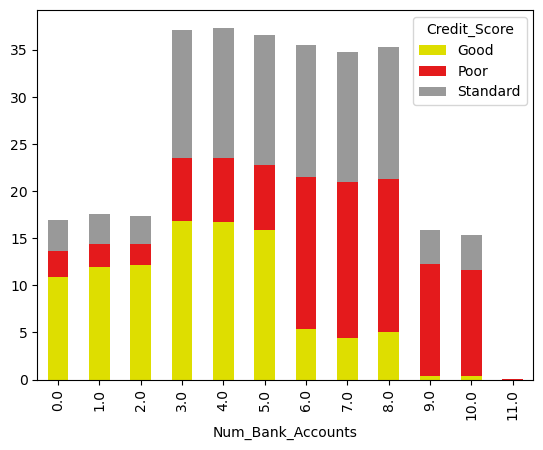

In [ ]:
# Num_Bank_Accounts

plot = pd.crosstab(index=df_train['Num_Bank_Accounts'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Podemos observar que hay una relación super alta entre tener más bancarias y un Credit_Score peor. Los valores se distribuyen uniformemente entre 0-2, 3-5, 6-8 y 9-10    (Por qué hay 0?)

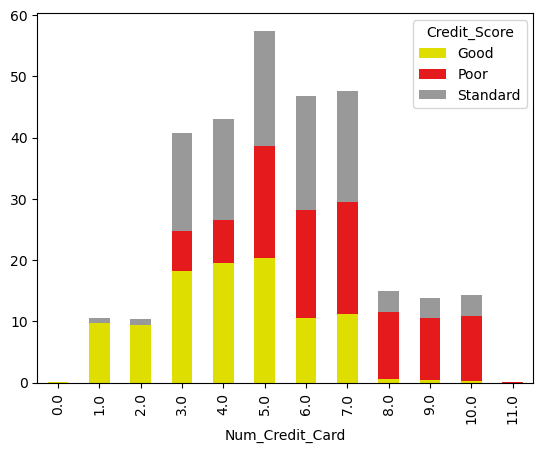

In [ ]:
# Num_Credit_Card

plot = pd.crosstab(index=df_train['Num_Credit_Card'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# La misma cosa, sólo que ahora se distribuye de otra forma, 0-2, 3-4, 5-7 y 8-10

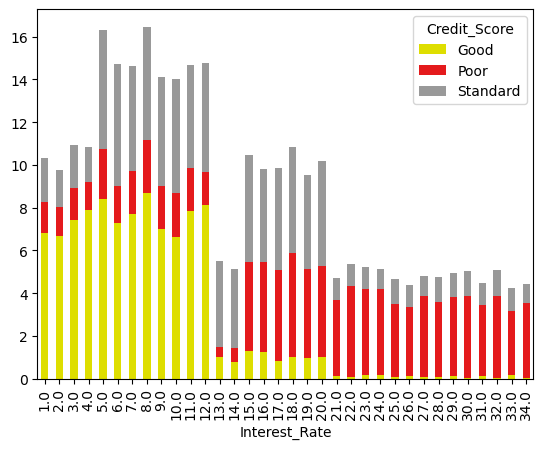

In [ ]:
# Interest_Rate

plot = pd.crosstab(index=df_train['Interest_Rate'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Más interés, más pobre 5 grupos claros. 1-4 5-12 13-14 15-20 21-34

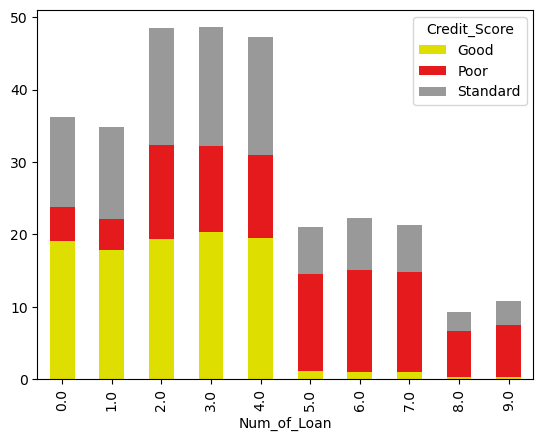

In [ ]:
# Num_of_Loan
plot = pd.crosstab(index=df_train['Num_of_Loan'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Más préstamos activos, más pobre. En este caso está repartido más o menos en grupos 0-1, 2-4 y 5-9

In [ ]:
# Type_of_Loan

# Ayuda por favor

# Ya haré esto

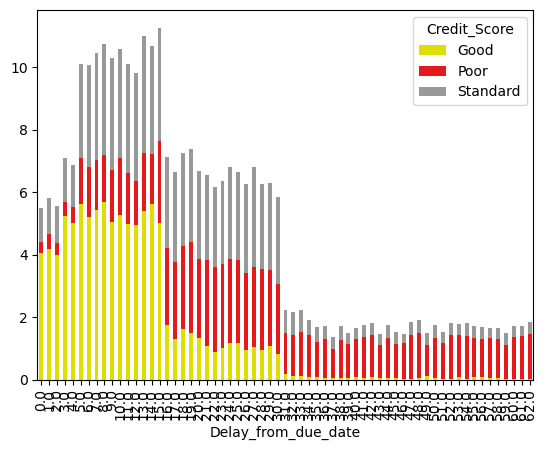

In [ ]:
# Delay_from_due_date
# Número medio de días de retraso en el pago

plot = pd.crosstab(index=df_train['Delay_from_due_date'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])
                          
# Bastante claro, está separado en unos 4 grupos
# Dividir en meses

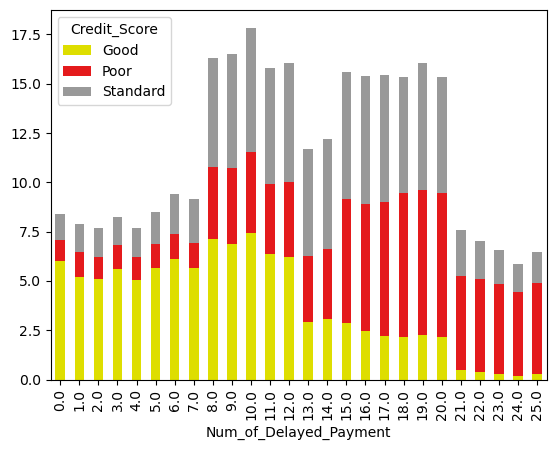

In [ ]:
# Num_of_Delayed_Payment
# Número medio de pagos atrasados del cliente

plot = pd.crosstab(index=df_train['Num_of_Delayed_Payment'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Como siempre, 4 grupos, 0-7, 8-14, 15-20, 21-25

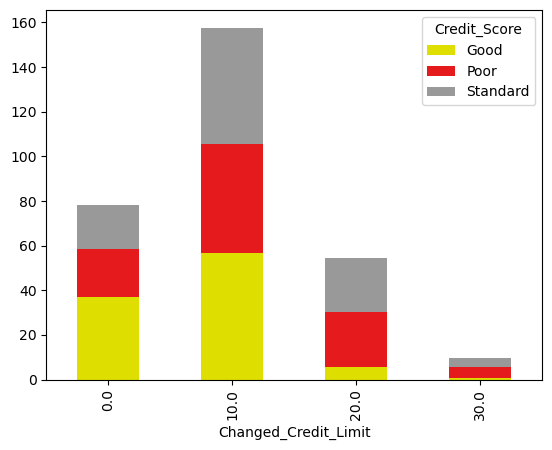

In [ ]:
# Changed_Credit_Limit
# Porcentaje de cambio en los límites de gasto del cliente..    No sé qué es esto
plot = pd.crosstab(index=df_train['Changed_Credit_Limit'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# No varía mucho, pero se ve que a menos porcentaje más bueno

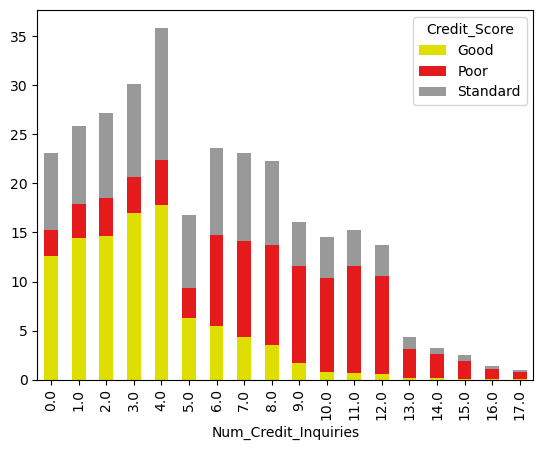

In [ ]:
# Num_Credit_Inquiries
# Número de consultas sobre tarjetas de crédito realizadas por el cliente.

plot = pd.crosstab(index=df_train['Num_Credit_Inquiries'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# No sé qué es esto de consultas, pero a menos consultas, mejor es el resultado

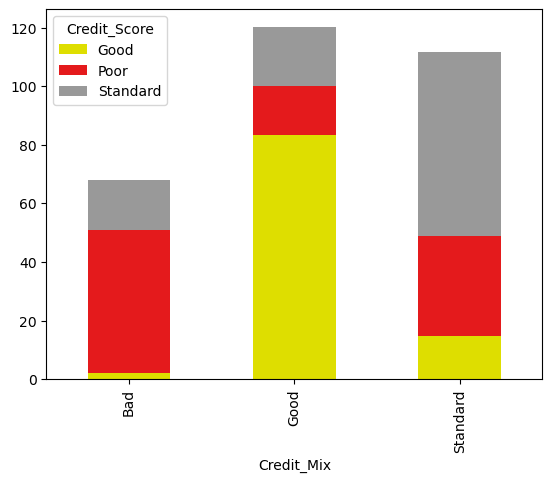

In [ ]:
# Credit_Mix

plot = pd.crosstab(index=df_train['Credit_Mix'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Good es más good, etc, obvio.

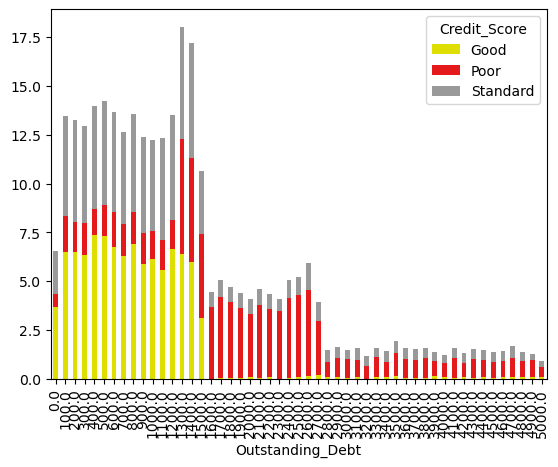

In [ ]:
# Outstanding_Debt
# Deuda en dólares
plot = pd.crosstab(index=df_train['Outstanding_Debt'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# A partir de la deuda de 1600 dólares, todos tienen un resultado muy pobre

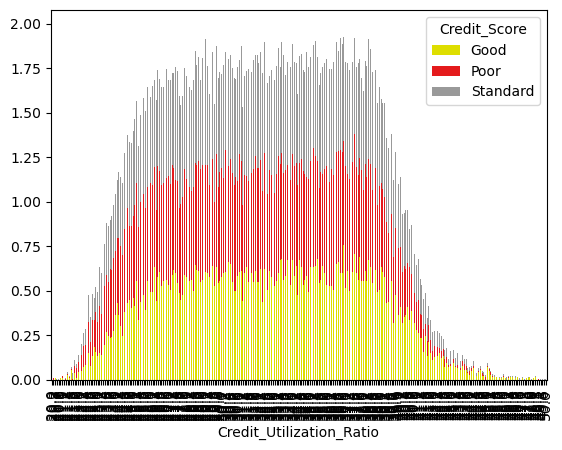

In [ ]:
# Credit_Utilization_Ratio

plot = pd.crosstab(index=df_train['Credit_Utilization_Ratio'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])


# No veo, ya lo veré en mejor detalle

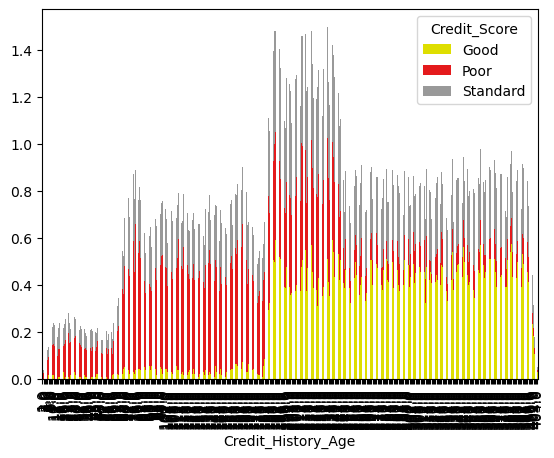

In [ ]:
# Credit_History_Age
# Antigüedad del historial de crédito.

plot = pd.crosstab(index=df_train['Credit_History_Age'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Antes del 202 muy pobre, después de un número que no alcanzo a ver es mejor

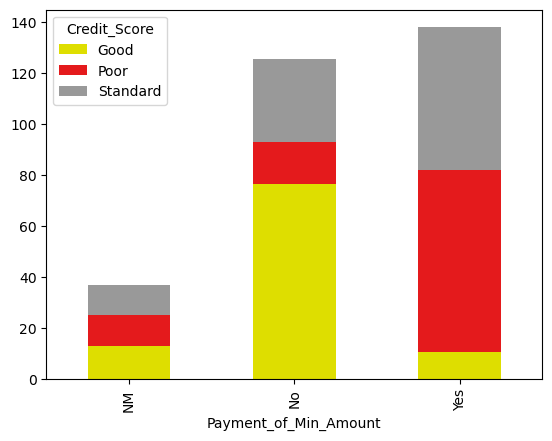

In [ ]:
# Payment_of_Min_Amount
# Representa si la persona sólo ha pagado el importe mínimo.

plot = pd.crosstab(index=df_train['Payment_of_Min_Amount'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Obvio                      

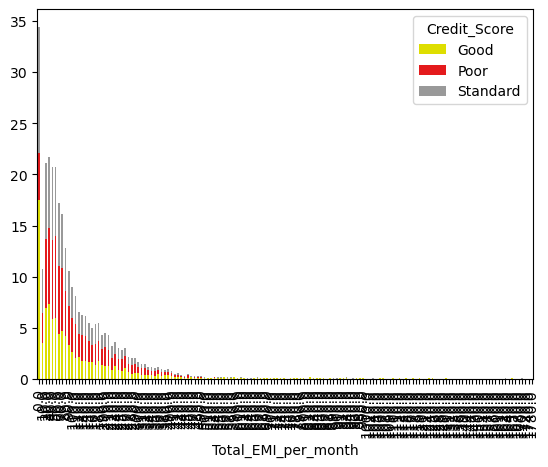

In [64]:
# Total_EMI_per_month
plot = pd.crosstab(index=df_train['Total_EMI_per_month'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])
# ESTA TABLA NO ES, TENGO QUE VOLVER A HACERLA

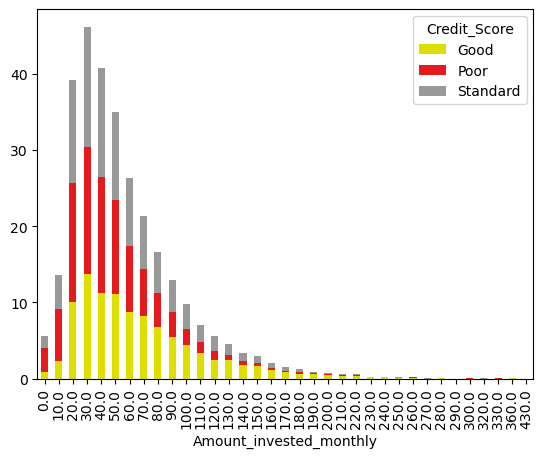

In [ ]:
# Amount_invested_monthly
plot = pd.crosstab(index=df_train['Amount_invested_monthly'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Menos invertido, más pobre

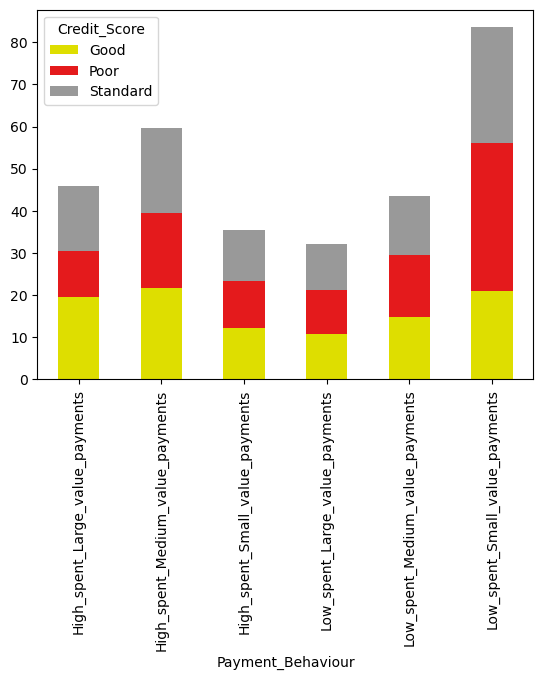

In [ ]:
# Payment_Behaviour

plot = pd.crosstab(index=df_train['Payment_Behaviour'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])

# Ya se ve, esta habría que ponerla en OneHotEncoder

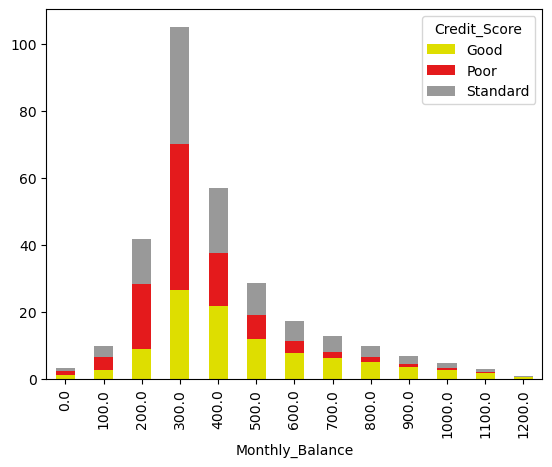

In [ ]:
# Monthly_Balance
plot = pd.crosstab(index=df_train['Monthly_Balance'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])


# Cuanto más alto, mejor es

Desbalanceo

In [ ]:
value_count = df_train['Credit_Score'].value_counts()
print("Número de observaciones para Good: ", value_count['Good'])
print("Número de observaciones para Poor: ", value_count['Poor'])
print("Número de observaciones para Standard: ", value_count['Standard'])
print("Proporción Standard/Good: ", round(value_count['Standard']/value_count['Good'], 2), " : 1")
print("Proporción Standard/Poor: ", round(value_count['Standard']/value_count['Poor'], 2), " : 1")
print("Proporción Poor/Good: ", round(value_count['Poor']/value_count['Good'], 2), " : 1")

Número de observaciones para Good:  14262
Número de observaciones para Poor:  23199
Número de observaciones para Standard:  42539
Proporción Standard/Good:  2.98  : 1
Proporción Standard/Poor:  1.83  : 1
Proporción Poor/Good:  1.63  : 1


## Pre procesamiento

In [20]:
count_vectorizer = CountVectorizer(tokenizer = lambda x: re.sub(", ", ",", x).replace("and ", "").split(',')) 
data = count_vectorizer.fit_transform(df_train['Type_of_Loan'])
print(count_vectorizer.get_feature_names())

['auto loan', 'credit-builder loan', 'debt consolidation loan', 'home equity loan', 'mortgage loan', 'no data', 'not specified', 'payday loan', 'personal loan', 'student loan']


In [ ]:
# Columnas innecesarias
df_train = df_train.drop('Month', axis=1)
df_train = df_train.drop('Name', axis=1)
df_train = df_train.drop('SSN', axis=1)
df_train = df_train.drop('Occupation', axis=1)
df_train = df_train.drop('ID', axis=1)
df_train = df_train.drop('Customer_ID', axis=1)

In [ ]:
tres_categorias = ["Bajo", "Medio", "Alto"]
cuatro_categorias = ["Bajo", "Medio", "Alto", "Muy alto"]
cinco_categorias = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy alto"]

valores = [-math.inf, 50000, 90000, math.inf]
df_train["Annual_Income"] = pd.cut(x=df_train["Annual_Income"], bins=valores, labels=tres_categorias)

valores = [-math.inf, 3000, 7000, math.inf]
df_train["Monthly_Inhand_Salary"] = pd.cut(x=df_train["Monthly_Inhand_Salary"], bins=valores, labels=tres_categorias)

valores = [-math.inf, 2, 5, 8, math.inf]
df_train["Num_Bank_Accounts"] = pd.cut(x=df_train["Num_Bank_Accounts"], bins=valores, labels=cuatro_categorias)

valores = [-math.inf, 2, 4, 7, math.inf]
df_train["Num_Credit_Card"] = pd.cut(x=df_train["Num_Credit_Card"], bins=valores, labels=cuatro_categorias)

valores = [-math.inf, 4, 12, 14, 20, math.inf]
df_train["Interest_Rate"] = pd.cut(x=df_train["Interest_Rate"], bins=valores, labels=cinco_categorias)

valores = [-math.inf, 1, 4, math.inf]
df_train["Num_of_Loan"] = pd.cut(x=df_train["Num_of_Loan"], bins=valores, labels=tres_categorias)

# Dividir en Meses
valores = [-math.inf, 4, 15, 30, math.inf]
df_train["Delay_from_due_date"] = pd.cut(x=df_train["Delay_from_due_date"], bins=valores, labels=cuatro_categorias)

valores = [-math.inf, 7, 14, 20, math.inf]
df_train["Num_of_Delayed_Payment"] = pd.cut(x=df_train["Num_of_Delayed_Payment"], bins=valores, labels=cuatro_categorias)

valores = [-math.inf, 10, 20, 30, math.inf]
df_train["Changed_Credit_Limit"] = pd.cut(x=df_train["Changed_Credit_Limit"], bins=valores, labels=cuatro_categorias)

valores = [-math.inf, 4, 12, math.inf]
df_train["Num_Credit_Inquiries"] = pd.cut(x=df_train["Num_Credit_Inquiries"], bins=valores, labels=tres_categorias)

valores = [-math.inf, 15, 22, math.inf]
df_train["Outstanding_Debt"] = pd.cut(x=df_train["Outstanding_Debt"], bins=valores, labels=tres_categorias)

valores = [-math.inf, 17, 46, math.inf]
df_train["Age"] = pd.cut(x=df_train["Age"], bins=valores, labels=tres_categorias)

In [ ]:
# Variables continuas: Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance
# Borramos las variables continuas

df_train = df_train.drop('Credit_Utilization_Ratio', axis=1)
df_train = df_train.drop('Credit_History_Age', axis=1)
df_train = df_train.drop('Total_EMI_per_month', axis=1)
df_train = df_train.drop('Amount_invested_monthly', axis=1)
df_train = df_train.drop('Monthly_Balance', axis=1)


# Borro de momento Type_of_Loan para que no estorbe
df_train = df_train.drop('Type_of_Loan', axis=1)


In [ ]:
df_train

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Medio,Alto,Alto,Bajo,Medio,Bajo,Bajo,Alto,Medio,Bajo,Bajo,Good,Alto,No,High_spent_Large_value_payments,Standard
1,Medio,Bajo,Bajo,Alto,Muy alto,Muy alto,Alto,Alto,Muy alto,Medio,Medio,Bad,Alto,Yes,High_spent_Large_value_payments,Standard
2,Bajo,Bajo,Bajo,Alto,Alto,Muy alto,Alto,Muy alto,Alto,Medio,Medio,Bad,Alto,Yes,High_spent_Large_value_payments,Standard
3,Medio,Bajo,Bajo,Alto,Alto,Bajo,Alto,Medio,Alto,Bajo,Medio,Standard,Alto,Yes,Low_spent_Large_value_payments,Standard
4,Medio,Medio,Medio,Alto,Bajo,Alto,Medio,Alto,Medio,Bajo,Medio,Standard,Alto,NM,Low_spent_Medium_value_payments,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,Alto,Alto,Alto,Medio,Alto,Bajo,Bajo,Medio,Alto,Bajo,Bajo,Standard,Bajo,Yes,High_spent_Large_value_payments,Standard
79996,Medio,Bajo,Bajo,Alto,Alto,Muy alto,Alto,Muy alto,Alto,Bajo,Medio,Bad,Alto,NM,High_spent_Small_value_payments,Poor
79997,Medio,Bajo,Bajo,Medio,Alto,Bajo,Medio,Alto,Medio,Medio,Medio,Standard,Alto,NM,High_spent_Medium_value_payments,Standard
79998,Bajo,Bajo,Medio,Alto,Muy alto,Muy alto,Alto,Muy alto,Alto,Bajo,Medio,Bad,Alto,Yes,Low_spent_Large_value_payments,Poor


In [ ]:
oe = OrdinalEncoder()

df_train[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Payment_Behaviour']] = oe.fit_transform(df_train[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Payment_Behaviour']])

df_train

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,Standard
1,2.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,2.0,0.0,Standard
2,1.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,Standard
3,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0,2.0,3.0,Standard
4,2.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,4.0,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,2.0,0.0,Standard
79996,2.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,Poor
79997,2.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,Standard
79998,1.0,1.0,2.0,0.0,3.0,3.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,2.0,3.0,Poor


## Entrenamiento

In [ ]:
y = df_train['Credit_Score']
df_train = df_train.drop('Credit_Score', axis=1)
X = df_train

In [ ]:
from sklearn.naive_bayes import CategoricalNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


clf = CategoricalNB(alpha=0)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred

c:\Users\sergi\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


array(['Standard', 'Poor', 'Good', ..., 'Good', 'Standard', 'Standard'],
      dtype='<U8')

In [ ]:
y_pred

array(['Standard', 'Poor', 'Good', ..., 'Good', 'Standard', 'Standard'],
      dtype='<U8')

In [ ]:
# Calculamos f1_score

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average=None)
print(f"The score is: {f1}") 

The score is: [0.60049007 0.6522816  0.6803611 ]


## Cosas Guarras (IGNORAR)

https://es.stackoverflow.com/questions/398654/como-ordenar-porcentajes-en-grafica-de-barras



Plot correlation in pandas

https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/


Tablas y cosas chulas

https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/

In [ ]:
# GUARRADAS Y PRUEBAS GUARRAS

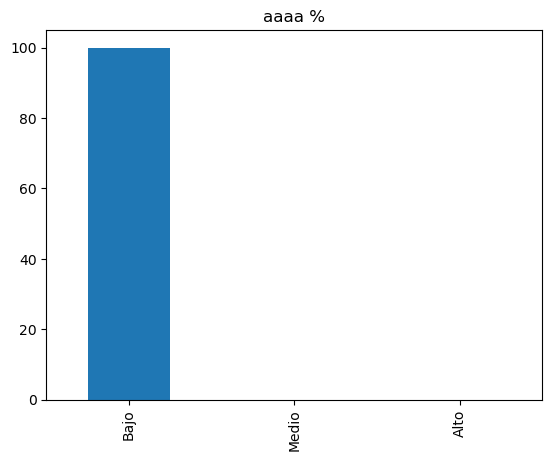

In [ ]:
# Month
# Representa el mes del año en el que se actualizó la información
# 
valores = [-math.inf, 50000, 90000, math.inf]
tres_categorias = ["Bajo", "Medio", "Alto"]

df_train["Annual_Income"] = pd.cut(x=df_train["Annual_Income"], bins=valores, labels=tres_categorias)

plot = (100 * df_train['Annual_Income'].value_counts() / len(df_train['Annual_Income'])).plot(
kind='bar', title='aaaa %')

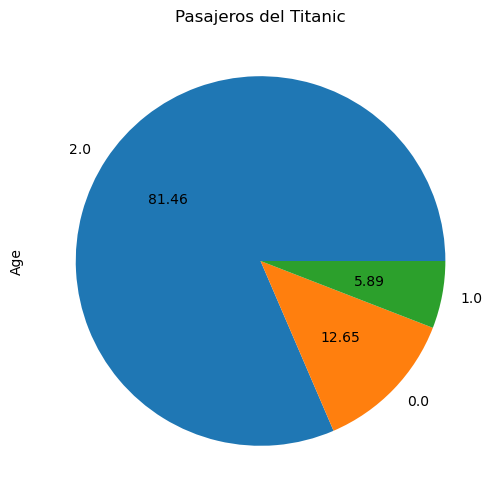

In [ ]:
plot = df_train['Age'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Pasajeros del Titanic')